In [49]:
#!pip install pandas_datareader to validate crypto pricing with specific date
import pandas_datareader as web
import datetime as dt
from datetime import date
import pandas as pd
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.pyplot as plt

start = dt.datetime(2021,10,1)
end = dt.datetime(2021,11,1)


In [50]:
MANA_Hist = web.DataReader('MANA-USD','yahoo', start, end)
MANA_Hist = MANA_Hist.reset_index()

In [51]:
SAND_Hist = web.DataReader('SAND-USD','yahoo', start, end)
SAND_Hist = SAND_Hist.reset_index()

In [52]:
ENJ_Hist = web.DataReader('ENJ-USD', 'yahoo', start, end)
ENJ_Hist = ENJ_Hist.reset_index()

In [53]:
colors = {'red': '#ff207c', 'grey': '#42535b', 'blue': '#207cff', 'orange': '#ffa320', 'green': '#00ec8b'}
config_ticks = {'size': 14, 'color': colors['grey'], 'labelcolor': colors['grey']}
config_title = {'size': 18, 'color': colors['grey'], 'ha': 'left', 'va': 'baseline'}

In [54]:
def get_max_row(crypto):
    column = crypto["Adj Close"]
    max_value = column.max()
    index = column.idxmax()
    return max_value, index
    

In [55]:
def get_min_row(crypto):
    column = crypto["Adj Close"]
    min_value = column.min()
    index = column.idxmin()
    return min_value, index

In [104]:
def get_charts(data, title):
    plt.rc('figure', figsize=(15, 10))
    
    fig, axes = plt.subplots(2, 1, 
                gridspec_kw={'height_ratios': [3, 1]})
    fig.tight_layout(pad=3)
    fig.suptitle(title, fontsize=16)
    
    date = data['Date']
    close = data['Close']
    vol = data['Volume']
    
    plot_price = axes[0]
    plot_price.plot(date, close, color=colors['blue'], 
    linewidth=2, label='Price')
    plot_price.set_ylabel('Price (in USD)', fontsize=14)
    plot_price.set_xlabel('Date', fontsize=14)
    
    
    plot_vol = axes[1]
    plot_vol.bar(date, vol, width=15, color='darkgrey')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Volume (in millions)', fontsize=14)

In [105]:
MANA_Hist_max_price, index = get_max_row(MANA_Hist)
MANA_Hist_min_price, index = get_min_row(MANA_Hist)

MANA_percentage_change = (MANA_Hist_max_price/MANA_Hist_min_price)*100

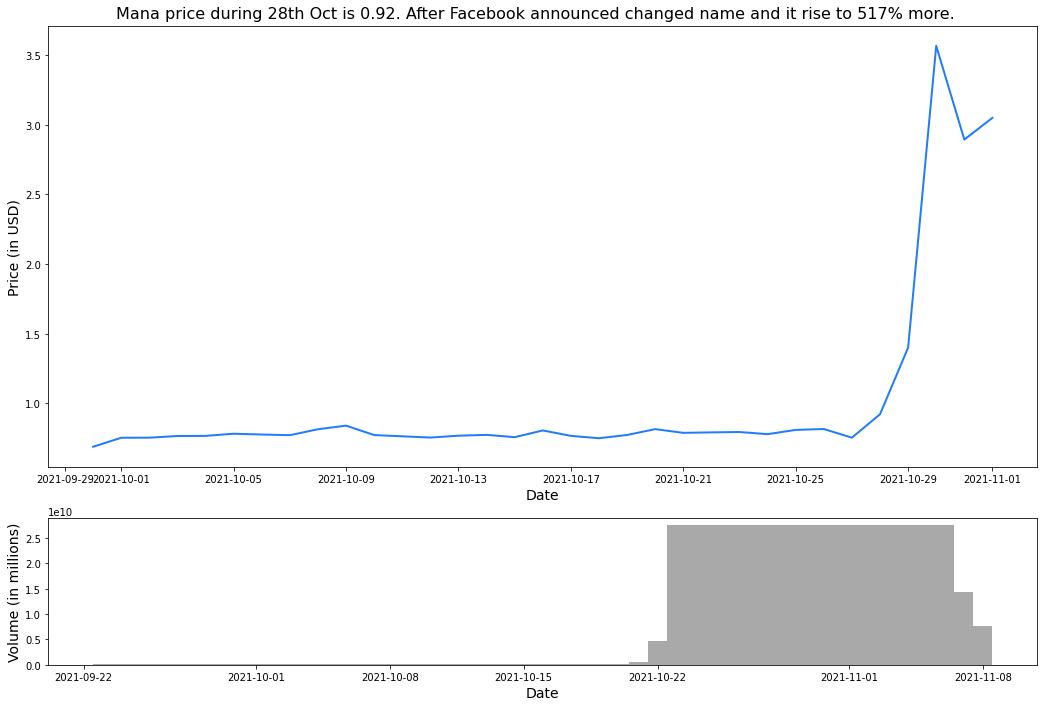

In [106]:
MANA = MANA_Hist[MANA_Hist['Date']== '2021-10-28']
get_charts(MANA_Hist, 'Mana price during 28th Oct is {0:.2f}. After Facebook announced changed name and it rise to {1}% more.'.format(MANA.iloc[0]['Close'],int(MANA_percentage_change)))

In [107]:
SAND_Hist_max_price, index = get_max_row(SAND_Hist)
SAND_Hist_min_price, index = get_min_row(SAND_Hist)

SAND_percentage_change = (SAND_Hist_max_price/SAND_Hist_min_price)*100

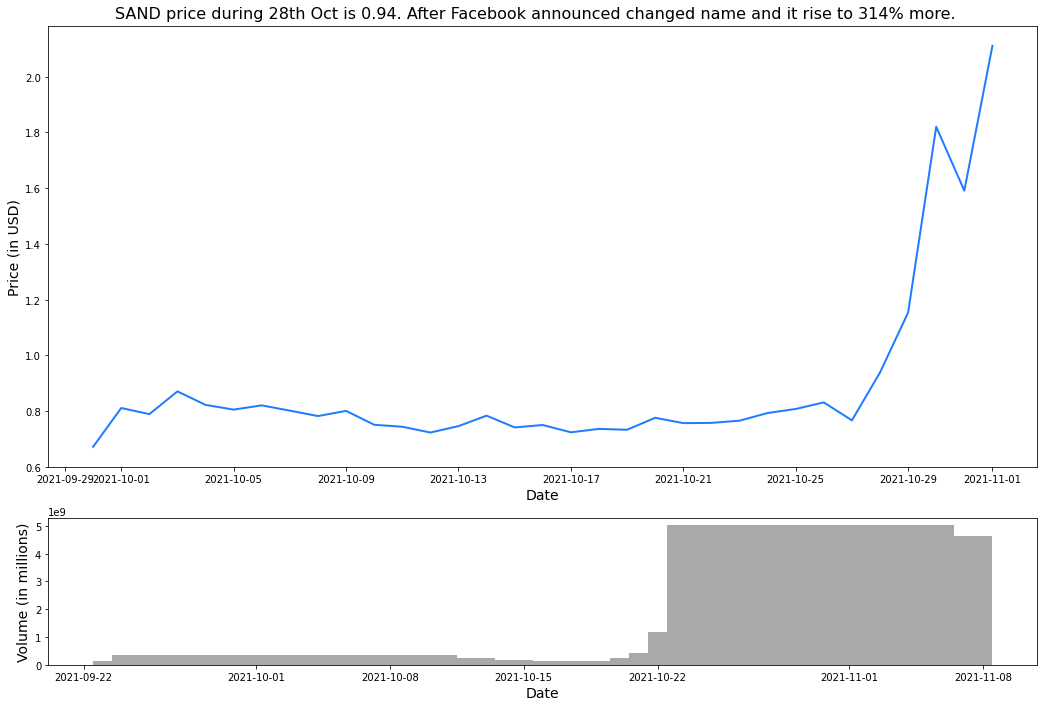

In [108]:
SAND = SAND_Hist[SAND_Hist['Date']== '2021-10-28']
get_charts(SAND_Hist, 'SAND price during 28th Oct is {0:.2f}. After Facebook announced changed name and it rise to {1}% more.'.format(SAND.iloc[0]['Close'],int(SAND_percentage_change)))

In [111]:
ENJ_Hist_max_price, index = get_max_row(ENJ_Hist)
ENJ_Hist_min_price, index = get_min_row(ENJ_Hist)

ENJ_percentage_change = (ENJ_Hist_max_price/ENJ_Hist_min_price)*100

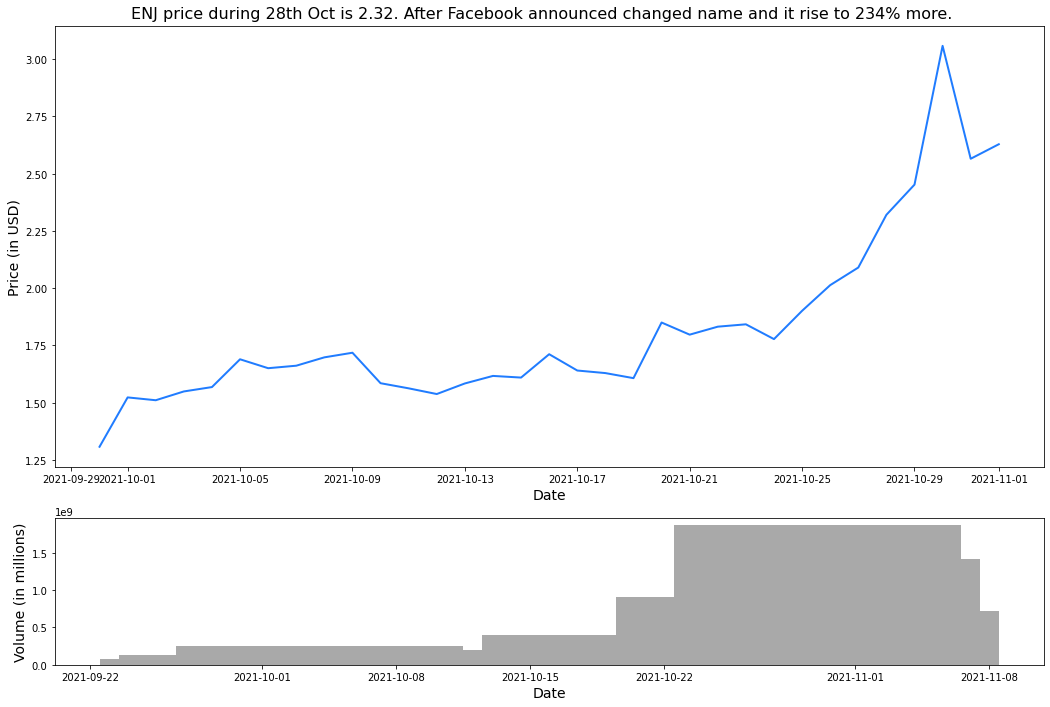

In [112]:
ENJ = ENJ_Hist[SAND_Hist['Date']== '2021-10-28']
get_charts(ENJ_Hist, 'ENJ price during 28th Oct is {0:.2f}. After Facebook announced changed name and it rise to {1}% more.'.format(ENJ.iloc[0]['Close'],int(ENJ_percentage_change)))